<a href="https://colab.research.google.com/github/Llmitless/AI_2s_1k/blob/main/Anisimov_Workbook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной 
x от одной или нескольких других переменных (факторов, регрессоров, 
независимых переменных) с линейной функцией зависимости. Линейная 
регрессия относится к задаче определения «линии наилучшего соответствия» 
через набор точек данных и стала простым предшественником нелинейных 
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом 
соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная 
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они 
вычисляют расстояние между предсказанным значением 𝑦(х) и его 
фактическим значением.
Одна очень распространенная функция потерь называется средней 
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все 
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через 
них провести кривую, которая как можно ближе проходила к этим точкам. При 
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми 
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть 
новых функций, которых нет в numpy.linalg

##1.1.1 Пример


0.9999999999999999 -0.9499999999999997


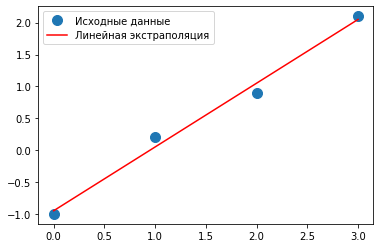

In [ ]:
#Задача:
#Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap где, A = [[x 1]] и p = [[m],[c]]
#Построим A по x :

A = np.vstack([x,np.ones(len(x))]).T
A

#Используем метод lstsq для решения его относительно вектора р.
m,c = np.linalg.lstsq(A,y,rcond = None)[0]
print(m,c)

#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt 
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

##1.1.2 Пример


[-5.09843282 -3.95035356 -3.41217681 -2.36747935 -0.61384977  0.00808382
  0.64376435  2.39995037  2.98858231  3.96213341  4.97504695]
[ 2.53735797e+01  1.59141332e+01  8.54824465e+00  3.65758884e+00
  7.65846872e-01 -7.96184462e-03  1.43188846e+00  3.90571896e+00
  8.83948538e+00  1.55747674e+01  2.53266210e+01]


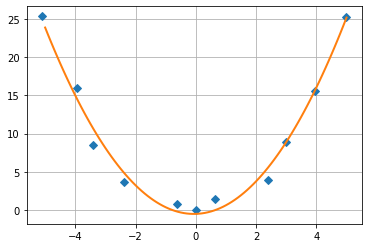

In [ ]:
"""
Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в 
построении эстраполяционного полинома второго порядка (параболы). Таким 
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу 
наименьших квадратов. Данные мтогут быть получены в результате 
измерений. Покажем пример генерации данных случайным образом и 
загрузки их из файла
"""
import matplotlib.pyplot as plt 
import numpy as np
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл 
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

#читаем данные из файлов 
x = fromfile('x_data.txt',float, sep='\n')
y = fromfile('y_data.txt',float, sep='\n')

print(x)
print(y)

#нахождение коэффициентов функции вида Y = ax^2 + bx + c + d  методом наименьших квадратов 
#задаем вектор m = [x**2,x,E]
m=vstack((x**2,x,ones(11))).T
#находим коэфициенты при составляющих вектора m
s=np.linalg.lstsq(m,y,rcond=None)[0]

#на отрезке [-5,5]
x_prec  = linspace(-5,5,101)
#рисуем точки 
plt.plot(x,y,'D')
# рисуем кривую вида у = ах^2 + bx + с, подставляя из решения коэффициенты s[8], 5[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)

plt.grid()

plt.savefig('napaona.png')


##1.1.3 Пример


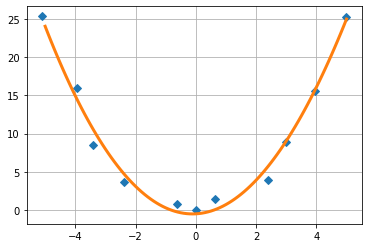

In [ ]:
#Задача:
#По данным предыдущего примера постройте эстраполяционного полинома 
#третьего порядка
# Нахождение коэффициентов функции ида у = ах^3 + bх^2 + сх + d методом наименьших кбадратов
import matplotlib.pyplot as plt 
import numpy as np
from numpy import *
from numpy.random import *
# задаем вектор т = [х"*3, х, Е]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих дектора т
s = np.linalg.lstsq(m, y, rcond = None) [0]

# на отрезке [-5,5]
х_ргес = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x,y,'D')
# рисуем крибую вида у = ах^3 + Вх^2 + сх + d, подставляя из решения коэффициенты s[0], 5[1], s[2], 5[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)

plt.grid()

plt.savefig('полином 3-й степени.png')


##ПОЛИНОМЫ

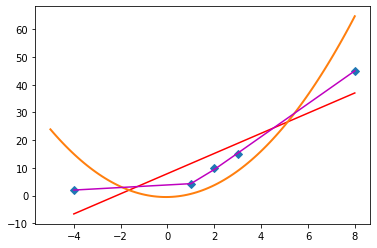

In [ ]:
#Задание 
#Представьте собственные данные и постройте эктраполяцию полиномами 
#первой, второй и третьей степени.
import numpy as np
import matplotlib.pyplot as plt
x = np.array([-4, 1, 2, 3, 8])
y = np.array([2, 4, 10, 15, 45])

plt.plot(x, y, 'D')

# Экстраполяция полиномом первой степени (прямая)
p1 = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p1, x), 'r')

# Экстраполяция полиномом второй степени (парабола)

p2 = np.polyfit(x, y, 2)
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)

# Экстраполяция полиномом третьей степени (кубическая кривая)
p3 = np.polyfit(x, y, 3)
plt.plot(x, np.polyval(p3, x), 'm')

# Вывод графика
plt.show()

##1.1.4 Пример


1.874369187473458e-05
0.009664512497531476


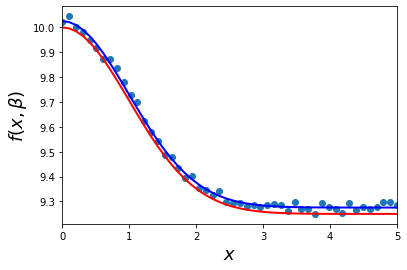

In [ ]:

#Задача:
#Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
#на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)
#Добавим шума d данные, сделанные по функции f(х,b) с коэффициентами Ь = (0.25, 0.75, 0.5)
from scipy import optimize
import scipy as sp
import matplotlib.pyplot as plt 
import numpy as np
from numpy import *
from numpy.random import *
beta = (9.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек хй
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.random(len(xdata))
#используем функцию для получения решения в виде козффициенной функции F(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()




##1.1.5 Пример

[0.22623234 0.75602112]
0.00015888426611721732
0.13970858089139176


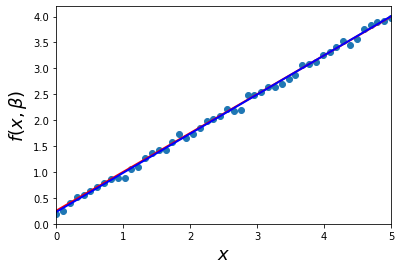

[0.22213849 0.79874744 0.48910787]
0.00014192915412218892
0.11835405934601363


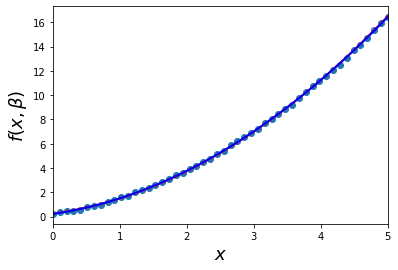

[1.00048589 2.00458676]
4.965208694514674e-05
0.11481754014488618


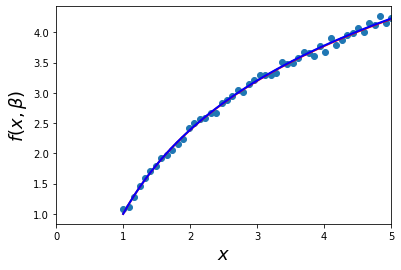

[0.99194413 2.00526819]
5.5097074846636296e-06
0.1348656394593012


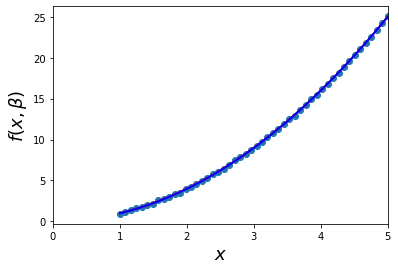

In [ ]:
"""
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида: 
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1
"""
import matplotlib.pyplot as plt 
import numpy as np
from numpy import *
from numpy.random import *
#решение
#1
#Добавим шума 6 данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def f(x, b0, b1):
  return b0 * x **b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()



[4.01625636 6.99430755]
0.0004730266117349164
0.09298468269652277


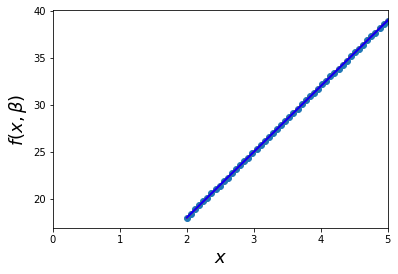

[1.0834471  1.97358048 3.00201999]
0.011128441101119836
0.10913688172786729


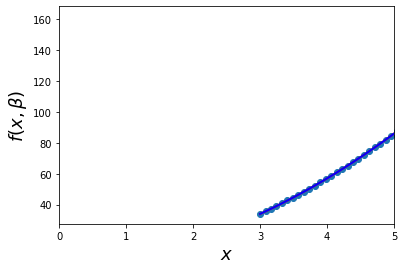

[2.96680817 6.02772411]
0.0001549535866394781
0.12075620477961196


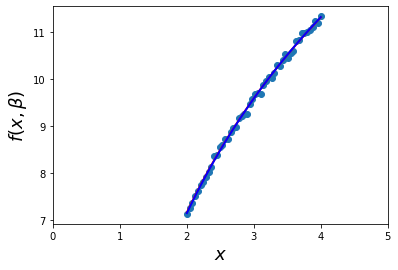

[1.9995042 3.0001772]
1.2155335016818314e-06
0.09545173177777058


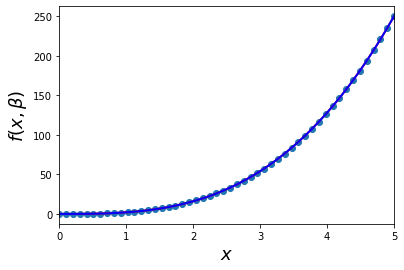

In [ ]:
"""
Задание:
Подставьте собственные данные и поэкспериментируйте с представленными 
функциями. Проанализируйте динамику изменения данных.
"""
import matplotlib.pyplot as plt 
import numpy as np
from numpy import *
from numpy.random import *
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) 
beta = (4, 7)
def f(x, b0, b1):
  return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(2, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) 
beta = (1, 2, 3)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x
# зададим массив точек xi
xdata = np.linspace(3, 7, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (3,6)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(2, 4, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (2,3)
def f(x, b0, b1):
  return b0 * x **b1
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


**1.2. Теоретический материал – Задачи регрессии**
**Линейная регрессия** - это широко используемый метод статистического 
анализа, который использует регрессионный анализ в математической 
статистике для определения количественной взаимосвязи между двумя или 
более переменными. Если регрессионный анализ включает две или более 
независимых переменных, а связь между зависимой и независимой 
переменными является линейной, тогда имееи дело с множественной линейной 
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного 
обучения можно использовать для реализации функций регрессии. Мы начнем 
с простой линейной регрессии с участием двух переменных, а затем перейдем к 
линейной регрессии с участием нескольких переменных.

##1.2.1 Пример

(20, 2)


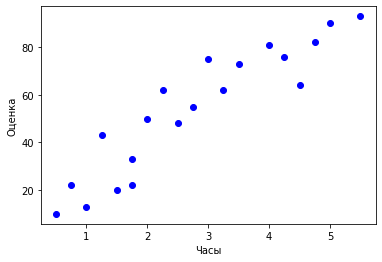

In [ ]:
#Задача:
#Построим простую линейную регрессию в Python с использованием 
#библиотеки scikit-learn

#Импортируем необходимые библиотеки
#используем pandas и питру для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания @заимосвязи между бременем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.00, 5.50],
'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

#Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию 
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки 
– это зависимые переменные, значения которых должны быть предсказаны. В 
нашем наборе всего два столбца и необходимо предсказать оценку в 
зависимости от количества часов. Чтобы извлечь атрибуты и метки, 
выполните следующий скрипт:


In [ ]:
#Решение:

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values 
print(X)
print(y)
#Теперь когда у нас есть атрибуты и метки необходимо разделить их на а обучающий и тестовый наборы
#Приведенный фрагмент разделяет 80% данных на обучающий набор а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с 
каждым затраченным часом на обучение результат экзамена повышается 
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы 
будем использовать наши тестовые данные и посмотрим, насколько точно наш 
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на 
тестовых данных необходимо выполнить следующий код

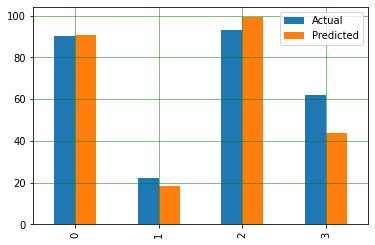

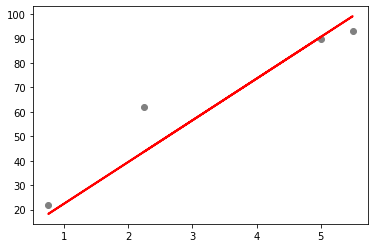

In [ ]:
#Решение:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame ({'Actual':y_test,'Predicted':y_pred})
df
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()
# построим линию регрессии с тестовыми данными 
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

Коэффициенты линии регрессии:  [9312.57512673]


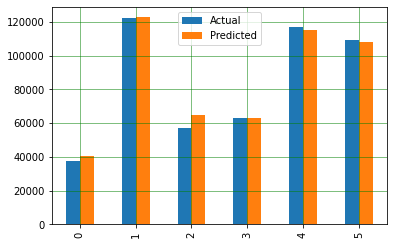

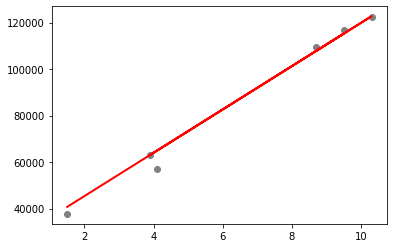

In [ ]:
"""
Задание:
Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
data = pd.read_csv(url)

X = data.iloc[:, :-1].values  # Опыт работы!!!!!!!!!
y = data.iloc[:, -1].values  # Зарплата

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Коэффициенты линии регрессии: ', regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame ({'Actual':y_test,'Predicted':y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

**1.3. Теоретический материал – Множественная регрессия**
В предыдущем примере мы проиллюстрировали линейную регрессию 
с двумя переменными. Однако, почти все реальные задачи имеют больше 
параметров. Линейная регрессия с участием нескольких переменных 
называется «множественной линейной регрессией» или многомерной 
линейной регрессией. Шаги для выполнения множественной линейной 
регрессии аналогичны шагам для простой . Разница заключается в оценке. 
Вы можете использовать множественную регрессию, чтобы узнать, какой 
фактор оказывает наибольшее влияние на прогнозируемый результат или 
как различные переменные связаны друг с другом.

##1.3.1 Пример


In [ ]:
#адача:
#Для решения задачи множественной регрессии можно задействовать уже 
#известный метод numpy.linalg.lstsq.
import numpy as np

у = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors

Х = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, у, rcond=None)[0]
print(linreg)

#Кроме этого можно использовать возможности библиотеки sсikit-learn. 
#Рассмотрим пример.


[0.2278716  0.36423044 0.03346137]


##1.3.2 Пример

In [ ]:
#Задача:
#Для данных из предыдущей задачи построить модель множественной 
#линейной регрессии с использованием средств библиотеки sсikit-learn.
#Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
у = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков

new_y = np.array(у)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

# изучим данные
print(dataset.shape)
dataset.describe()

# разделим данные на метки и атрибуты 
X = dataset[['x1','x2','x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# для обучения алгоритма мы выполняем тот же код что и раньше используя метод fit() класса LinearReegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

#чтобы сделать прогнозы на тестовых данных выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

# последний шаг - оценить производительность алгоритм. Мы сделаем это найдя значения для MSE
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))



(23, 4)
Mean Squared Error: 1.3272699242343076


Коэффициенты множественной линейной регрессии:  [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


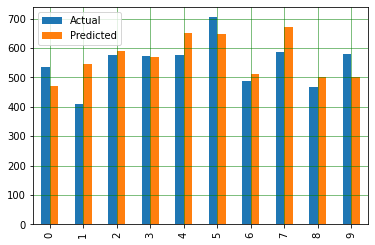

In [ ]:
"""
Задача:
Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз.
"""
#Был взять первый вариант
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
data = pd.read_csv(url)

X = data.iloc[:, :-1].values  # Признаки
y = data.iloc[:, -1].values  # Потребление газа

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Коэффициенты множественной линейной регрессии: ', regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame ({'Actual':y_test,'Predicted':y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()



##Задание*

Значения X: [3.  3.2 3.4 3.6 3.8 4. ]
Значения Y: [6. 2. 6. 4. 3. 4.]
Коэффициенты полинома первой степени: -16.910714285713148 35.74999999999842
Коэффициенты полинома второй степени: 2.2321428571426667 -16.910714285713148 35.74999999999842


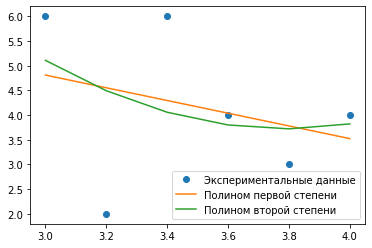

In [ ]:
#ВАРИАНТ 4

"""
Задача: Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов.

Для построения полиномов первой и второй степени,
 аппроксимирующих результаты эксперимента, необходимо использовать 
 метод наименьших квадратов. Этот метод позволяет найти такие 
 коэффициенты полинома, при которых сумма квадратов отклонений 
значений Y от значений, вычисленных по полиному, минимальна

Остаточный член — разность между заданной функцией и функцией 
её аппроксимирующей. Тем самым оценка остаточного члена является 
оценкой точности рассматриваемой аппроксимации.
 Этот термин применяется, например, в формуле ряда Тейлора.
"""
import numpy as np
import matplotlib.pyplot as plt

# Задаем значения X и Y
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8,4.0])
y = np.array([6.0, 2.0, 6.0, 4.0, 3.0,4.0])

# Построение полинома первой степени
A = np.vstack([x, np.ones(len(x))]).T
a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
p1 = a0 + a1*x

# Построение полинома второй степени
A = np.vstack([x**2, x, np.ones(len(x))]).T
a2, a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
p2 = a0 + a1*x + a2*x**2

# Вывод таблиц значений
print('Значения X:', x)
print('Значения Y:', y)
print('Коэффициенты полинома первой степени:', a1, a0)
print('Коэффициенты полинома второй степени:', a2, a1, a0)

# Построение графиков
plt.plot(x, y, 'o', label='Экспериментальные данные')
plt.plot(x, p1, label='Полином первой степени')
plt.plot(x, p2, label='Полином второй степени')
plt.legend()
plt.show()
